In [6]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [7]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure_all()
circuit.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

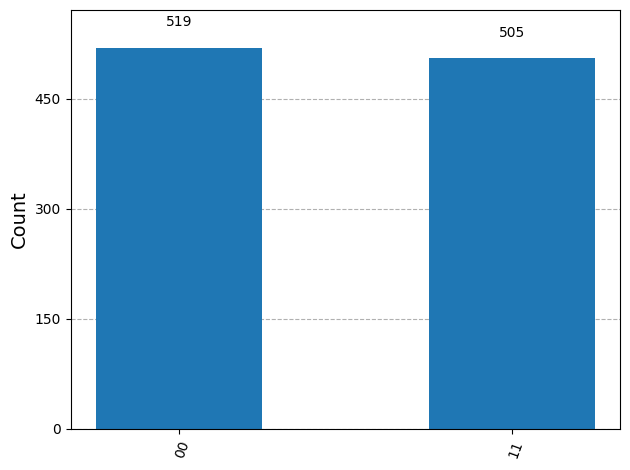

In [11]:
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit).result()
plot_histogram(result.get_counts())

In [9]:
#https://quantum.cloud.ibm.com/docs/en/tutorials/hello-world

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# service = QiskitRuntimeService(channel='ibm_quantum', token='YOUR_IBM_QUANTUM_CLOUD_API_KEY')
service = QiskitRuntimeService(token='YOUR_IBM_QUANTUM_CLOUD_API_KEY')

qiskit_runtime_service._discover_account:WARNING:2026-01-27 21:32:48,308: Loading account with the given token. A saved account will not be used.
qiskit_runtime_service.__init__:WARNING:2026-01-27 21:32:50,807: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().


qiskit_runtime_service.backends:WARNING:2026-01-27 21:32:53,894: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2026-01-27 21:32:55,221: Using instance: open-instance, plan: open


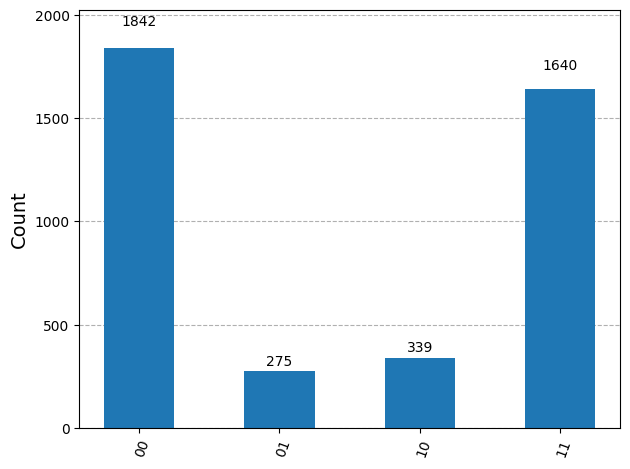

In [13]:
backend = service.least_busy(operational=True, simulator=False) # select least busy quantum computer

# pm = generate_preset_pass_manager(backend=backend, optimization_level=1) # optimize the circuit for quantum execution
# isa_circuit = pm.run(circuit) # modify circuit for qcomp's specific Instruction Set Architecture (ISA)
isa_circuit = transpile(
    circuit,
    target=backend.target,   
    optimization_level=1
)

isa_circuit.draw()

sampler = Sampler(backend)
job = sampler.run([isa_circuit])
result = job.result()
plot_histogram(result[0].data.meas.get_counts())